# Basic Random Walk

This is a basic 1-dimensioanl random walk.

First, import the needed libraries

In [2]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
%matplotlib inline

Now take the walks

In [9]:
class RandomWalks:
    def __init__(self):
        """
        Initialize the attributes
        """
        self.steps = np.zeros(1)
        self.walks = np.zeros(1).reshape(-1, 1)
        self.mean_dist = 0

    def make_walks(self, number_of_walks, steps_in_each_walk):
        """
        Parameters
        ----------
        number_of_walks : int
            The number of random walks to make.

        steps_in_each_walk : int
            The number of steps to take in each walk.
        """
        # Make random distances for each step
        step_distances = random.randn(number_of_walks * (steps_in_each_walk - 1)).reshape(number_of_walks, -1)

        # Make each walk start at step 0 by horizontally stacking 0s
        # at the beginning of the walks

        starts = np.zeros(step_distances.shape[0]).reshape(-1, 1)
        walk_distances = np.hstack([starts, step_distances])
        walks = walk_distances.cumsum(axis=1)

        # Now make an array of integers that will serve as the x axis
        steps = np.arange(walks.shape[1])

        # Find the mean distance at the end of each walk by taking the mean
        # of the last column of walks

        mean_dist = walks[:, -1].mean()

        # Store the results as instance attributes
        self.walks = walks
        self.steps = steps
        self.mean_dist = mean_dist
        
    def plot_walks(self):
        """
        Plots the walks
        """
        # Copy the instance attributes to local variables
        steps = self.steps
        walks = self.walks
        mean_dist = self.mean_dist
        
        # Colors, labels, and alpha settings for our lines
        colors = ['r', 'g', 'b', 'm', 'c']
        labels = ['A', 'B', 'C', 'D', 'E']
        alpha = 0.5

        # Create a grid of 1 by 1 plots and size it
        fig = plt.figure(figsize=(15, 5))
        ax = fig.add_subplot(1, 1, 1)

        # Make the axis labels
        ax.set_ylabel('distance')
        ax.set_xlabel('steps')

        # Force the x axis limits to match the first and last step
        # by default matplotlib may try to pad this which will make
        # it look like a mess

        ax.set_xlim(steps[0], steps[-1])

        # Plot each walk. Zip together the iterables we will need and
        # just plot to the same axes

        for walk_idx, color, label in zip(range(walks.shape[0]), colors, labels):
            ax.plot(steps, walks[walk_idx], label=label, color=color, lw=1)

        # Behind every great plot is an inspirational legend.
        # Make your here

        ax.legend(loc='best')

        # Make a line (and label for it) that show the mean distance
        # convered by each walk

        ax.axhline(mean_dist, 0, steps[-1])
        ax.text(steps[-1] + 1, mean_dist, 'μ={:.2f}'.format(mean_dist))

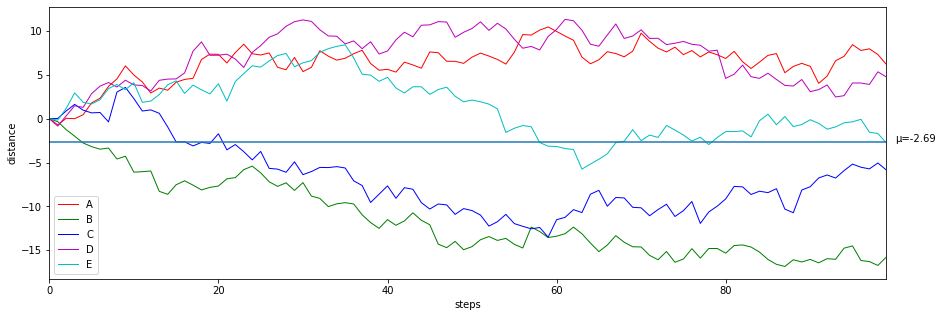

In [11]:
random.seed(13)
rw = RandomWalks()
rw.make_walks(5, 100)
rw.plot_walks()